## Detect rainy season onset with ROMP

This demo shows examples of how to detect rainy season onset using the ROMP tool package.  

the objective is to:
1. know the parameters in `config.in` that set the onset threshold
2. understand how these parameters affect the onset detection 

In [33]:
import momp.lib.loader as loader
get_cfg = loader.get_cfg
from pathlib import Path
from IPython.display import Image, display

<br>

#### The onset threshold parameters in ROMP include:  

 `wet_init` Rain threshold (mm) to identify the first potential wet day.

 `wet_threshold` Rainfall threshold (mm) used only if no spatial thresh_file is provided.

 `wet_spell` Minimum number of days the accumlated rainfall must stay above threshold (Wet Spell).

 `dry_spell` Maximum number of consecutive dry days allowed after onset.

 `dry_extent` Search window (days) after onset to check for dry spell. 

<br>

First, we use the ICPAC operational seasonal rainfall onset definition as an example, where the threshold on accumulated rainfall technique is used: any day with less than 1 mm/day  rainfall is considered a dry day, days with at least 1 mm/day  rainfall are considered wet days. The rainy season onset date is then defined as the first day of a wet spell if the total rainfall accumulation within 3 consecutive days exceeds 20 mm and there is no dry spell of 7 or more days within the next 21 days.  

the corresponding threshold settings in `config.in` are
```
wet_init = 1
wet_threshold = 20
wet_spell = 3
dry_spell = 7
dry_extent = 21
```

Once we set these parameters, save the config file and import the onset_time_series diagnositic API from the ROMP as

In [34]:
# from momp.app.onset_time_series import obs_onset_analysis as ons
import momp.app.onset_time_series as ots
ons = ots.obs_onset_analysis
cfg = get_cfg()
print("dry_extent = ", cfg.dry_extent)

Configuration validated!
dry_extent =  21


<br>

we select year 2020, location 10N, 40E as an example to see if there is an onset  




--------------------------------------------------
Processing year 2020

 WARNING - specified region is not in cartopy.io.shapereader
xxxxxxxx
onset time series figure saved to ../demo/et/figure/onset_time_series.png


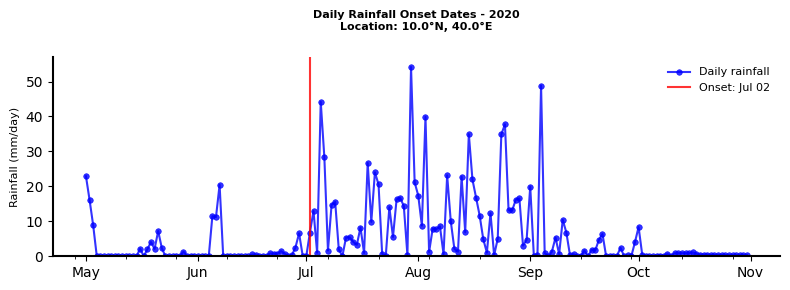

In [35]:
_ = ons(year=2020, lat_select=10, lon_select=40, **vars(cfg))

<br>

The red line marks the onset of the rainy season, according to the onset definition.   

But we notice a few rainfall spikes in early June. Because of the dry spell constraint, that group of events are not considered as true onset.   

Now let's change the `dry_extent` to 0, which means to remove the dry spell constraint. run the diagnostic and see if an early onset is detected. 

package base dir ~/Code/benchmarking/momp
Configuration validated!
Configuration validated!
Configuration validated!
dry_extent =  0

--------------------------------------------------
Processing year 2020

 WARNING - specified region is not in cartopy.io.shapereader
xxxxxxxx
onset time series figure saved to ../demo/et/figure/onset_time_series.png


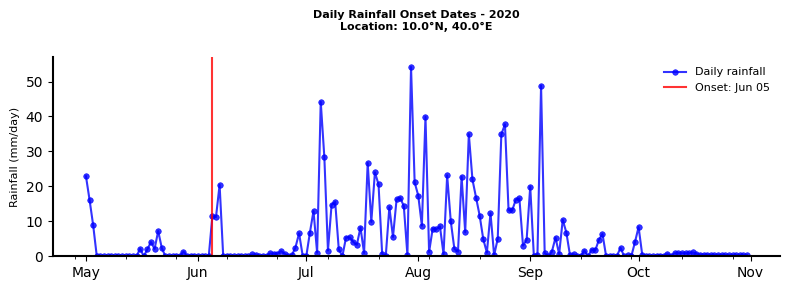

In [36]:
import importlib
importlib.reload(loader)
importlib.reload(ots)
ons = ots.obs_onset_analysis
get_cfg = loader.get_cfg
cfg = get_cfg()
print("dry_extent = ", cfg.dry_extent)
_ = ons(year=2020, lat_select=10, lon_select=40, **vars(cfg))

<br>

now we see the detection catch the Jun 05 as the onset date, if the following dry spell is ignored.

In [40]:
import momp.app.onset_spatial as osp
spatial_onset = osp.spatial_onset

Loading observational rainfall data...

 WARNING - specified region is not in cartopy.io.shapereader
xxxxxxxx
Detecting observed onset...
Detected resolution: 0.2 degrees
WARNING - specified region is not in cartopy.io.shapereader

 WARNING - specified region is not in cartopy.io.shapereader


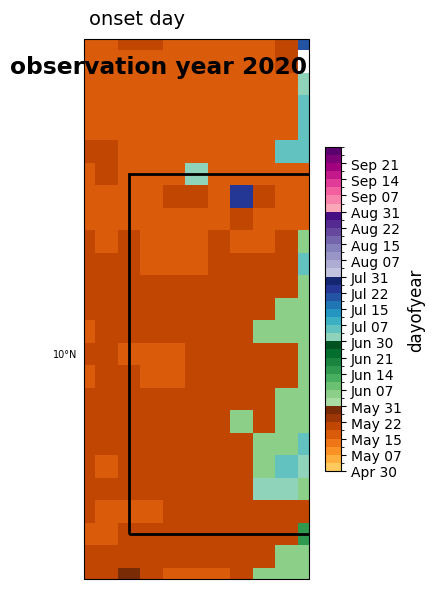

<xarray.DataArray 'dayofyear' (lat: 49, lon: 61)> Size: 24kB
array([[139., 139., 142., ...,  nan,  nan,  nan],
       [141., 139., 141., ...,  nan,  nan,  nan],
       [141., 139., 139., ...,  nan,  nan,  nan],
       ...,
       [216., 220., 220., ..., 185.,  nan,  nan],
       [216., 199., 199., ..., 185., 185.,  nan],
       [213., 200., 199., ...,  nan, 196., 196.]], shape=(49, 61))
Coordinates:
  * lat      (lat) float32 196B 3.0 3.25 3.5 3.75 4.0 ... 14.25 14.5 14.75 15.0
  * lon      (lon) float32 244B 33.0 33.25 33.5 33.75 ... 47.25 47.5 47.75 48.0

In [47]:
spatial_onset(2020, **vars(cfg))